In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import math

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
#import pandas.io.data
data = pd.DataFrame()

In [4]:
def dataRead():
    df = pd.read_csv('new_train.csv',skipinitialspace=True)
    #print df.head()

    null_rows = df[df.isnull().any(axis=1)]# All the rows that have a null value

    null_cols = df.columns[df.isnull().any()].tolist()# Alll the columns that have a null value
    
    

    print ('Null_rows')
    print (null_rows)

    print ('Null_columns')
    print (null_cols)
    #print type(df['site'][3])

    return df

In [5]:
def dataAnalysis():
    df = dataRead()
    #df['VEHICLE_TYPE'] = map(lambda x: x.upper(), df['VEHICLE_TYPE'])
    
    '''we set a working frame'''
    wf = df
    print (wf.shape)
    
    '''we start with identifying the columns in which data is missing'''
    null_cols = df.columns[df.isnull().any()].tolist()# Alll the columns that have a null value
    all_cols = df.columns
    
    print ("Null_Columns:")
    print (null_cols)
    
    print ("All Columns:")
    print (all_cols)
    
    '''Next we need to calculate the perccentage of dataset that has missing data points'''
    
    total_cells = df.shape[0]*df.shape[1]
    n_empty_cells = df.isnull().values.ravel().sum()   #total number of empty cells
    
    n_rows = df.shape[0]
    n_empty_rows = df.shape[0] - wf.dropna().shape[0]
    
    percentage_null_cells = float(n_empty_cells)/total_cells
    percentage_null_rows = float(n_empty_rows)/n_rows
    
    #print n_empty_cells
    #print n_empty_rows
    print ('% of empty rows: ',percentage_null_rows)
    print ('% of empty cells: ',percentage_null_cells)
    
    print (wf.describe())
    
    wf['Garden'].fillna(method='ffill',inplace=True)
    wf['King_visit'].fillna(method='ffill',inplace=True)
    
    n_rows_wf = wf.shape[0]
    n_empty_rows_wf = wf.shape[0] - wf.dropna().shape[0]
    
    percentage_null_rows_wf = float(n_empty_rows_wf)/n_rows
    
    #print n_empty_cells
    #print n_empty_rows
    print ('% of empty rows of wf: ',percentage_null_rows_wf)
    
    wf.drop('Garden',axis=1)
    wf.drop('King_visit',axis=1)
    
    wf_lin_interpol = wf.interpolate()
    wf_lin_interpol.to_csv('LinearInterpolated.csv')
    heat_map_data = wf_lin_interpol[['Built_Date','Priced_Date','Garden','Dock_Distance','Capital_Distance',
    'Royal_Distance','Guarding_Distance','River_distance','Renovation','Dining_Rooms','Bedroom',
    'Bathroom','King_visit','Curse','Blessing','Knight_Distance','Golden_Grains']].copy()
    
    print ('Heat_Map_data',heat_map_data.describe())
    
    #flights = sns.load_dataset("flights")
    #flights = flights.pivot("month", "year", "passengers")
    ax = sns.heatmap(heat_map_data.corr(), annot = 'true')
    plt.show()

Null_rows
       House_ID    Built_Date   Priced_Date  Garden  Dock_Distance  \
0      6e32cec0   42116021241   70916090111     0.0     138.600639   
3      6e32cfa9   81816061223   12016081045     0.0      82.283966   
4      6e32cfb7   91116031153   52016111649     0.0      34.524141   
5      6e32cfd5   61316011325   61916110413     NaN      38.877415   
7      6e32d0f3  112216000000   11316111132     0.0      83.914728   
8      6e32d166   10716020334   10216071519     0.0      64.288283   
10     6e32d244   32216040245  100816000000     0.0      74.890453   
11     6e32d266   32116030745   91116111314     0.0       1.624838   
13     6e32d28a   21516060848   11116080913     NaN            NaN   
14     6e32d2e0   91916041728  101916000000     0.0      86.072564   
15     6e32d315   30716020221   51816071132     0.0      51.245386   
16     6e32d328  120616000000  101016000000     0.0      34.410733   
17     6e32d349  110316000000   80216091328     NaN            NaN   
20     6e3

('Heat_Map_data',          Built_Date   Priced_Date   Garden  Dock_Distance  Capital_Distance  \
count  1.650000e+04  1.650000e+04  16500.0   16500.000000      16500.000000   
mean   6.611119e+10  6.687784e+10      0.0      46.278528         42.613428   
std    3.456323e+10  3.433700e+10      0.0      33.604434         33.173195   
min    1.011600e+10  1.011607e+10      0.0       0.000288          0.000714   
25%    3.271604e+10  4.031609e+10      0.0      19.288062         15.956584   
50%    6.271600e+10  7.021611e+10      0.0      39.076012         34.539386   
75%    9.271604e+10  1.002160e+11      0.0      67.012017         62.717937   
max    1.228160e+11  1.228160e+11      0.0     157.658673        156.893349   

       Royal_Distance  Guarding_Distance  River_distance    Renovation  \
count    16500.000000       16500.000000    16500.000000  16500.000000   
mean        48.456835         101.402274       30.231221      0.194727   
std         32.989639          64.455715       2

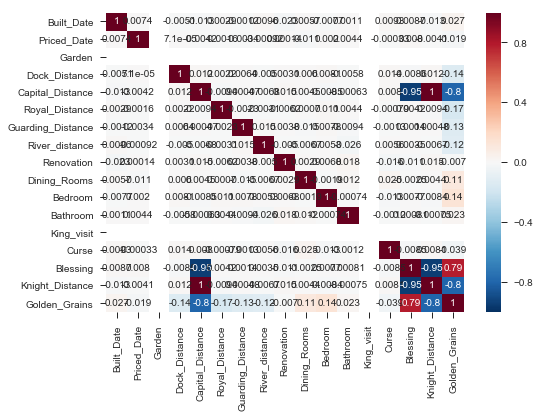

In [6]:
dataAnalysis() 